# **Project Name : Health_Insurance_Cross_Sell_Prediction :**

---



---
## **Project Type: Classification**


## **Project Summary :**

---

---

### An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee. For example, One may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if that person falls ill and needs to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.
### Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.
### Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue. Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.


## **Data Description :**
_ _ _


---



### **TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv ⇒** Contains the Historical data of the the Insurance company.

**1. id ⇒** Unique id of the customer.

**2. Gender ⇒** Gender of the customer.(male / female)

**3. Age ⇒** Age of the customer

**4. Driving License ⇒** Customer has the DL or not.

**5. Region_Code ⇒** Unique code for the region of the customer.

**6. Previously_insured ⇒** Customer already has vehicle insurance or not.

**7. Vehicle_Age ⇒** Age of the vehicle.

**8. Vehicle_damage ⇒** Past damages of the vehicle still present or not.

**9. Annual_premium ⇒** The amount of money the customer needs to pay as premium.

**10. PolicySalesChannel ⇒** Anonymized code for the channel of outreaching to the customer ie. Different Agents, Over mail, over phone, in person, etc.

**11. Vintage ⇒** Number of Days, Customer has been associated with the company.

**12. Response ⇒** Customer is interested in the Insurance or not.



In [1]:
# Importing the Libraries.

import numpy as np
import pandas as pd

# Plotation
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import log_loss

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.model_selection import cross_validate

import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
#  Mounting the Drive.
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
# Reading the Insurance dataset.
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/PROJECT/Project-3 (Classification)/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv")

## UNDERSTANDING THE DATASET :

---



In [4]:
# First look of the Dataset.
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [5]:
# Checking the shape.
df.shape

(381109, 12)

In [6]:
# Checking the number of Numerical and Categorical Columns.
print("Numerical columns count:", len(df.select_dtypes(np.number).columns),"|","Categorical columns count:", len(df.select_dtypes(exclude=np.number).columns))

Numerical columns count: 9 | Categorical columns count: 3


In [7]:
# Checking the information of the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [8]:
# Description of the dataset.
df.describe(include='all')

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109,381109.000000,381109.000000,381109.000000,381109.000000,381109,381109,381109.000000,381109.000000,381109.000000,381109.000000
unique,NaN,2,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,1-2 Year,Yes,NaN,NaN,NaN,NaN
freq,NaN,206089,NaN,NaN,NaN,NaN,200316,192413,NaN,NaN,NaN,NaN
mean,190555.000000,NaN,38.822584,0.997869,26.388807,0.458210,NaN,NaN,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,NaN,15.511611,0.046110,13.229888,0.498251,NaN,NaN,17213.155057,54.203995,83.671304,0.327936
min,1.000000,NaN,20.000000,0.000000,0.000000,0.000000,NaN,NaN,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,NaN,25.000000,1.000000,15.000000,0.000000,NaN,NaN,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,NaN,36.000000,1.000000,28.000000,0.000000,NaN,NaN,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,NaN,49.000000,1.000000,35.000000,1.000000,NaN,NaN,39400.000000,152.000000,227.000000,0.000000


In [9]:
# Checking the columns of the dataset.
df.columns.tolist()

['id',
 'Gender',
 'Age',
 'Driving_License',
 'Region_Code',
 'Previously_Insured',
 'Vehicle_Age',
 'Vehicle_Damage',
 'Annual_Premium',
 'Policy_Sales_Channel',
 'Vintage',
 'Response']

In [10]:
# Checking the duplicates.
df.duplicated().sum()

0

In [11]:
# Checking the Null values.
df.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

## REMARKS :

---

> ### There are 381109 Rows and 12 Columns.
> ### We have 9 Numerical and 3 Categorical columns.
> ### There is no duplicated values present in the dataset.
> ### We can see that there is no null value present in the dataset.

In [12]:
# Droping the "ID" Column because of no use.
df.drop(columns="id",axis=1, inplace=True)

## Checking the Outliers and Data Distribution.

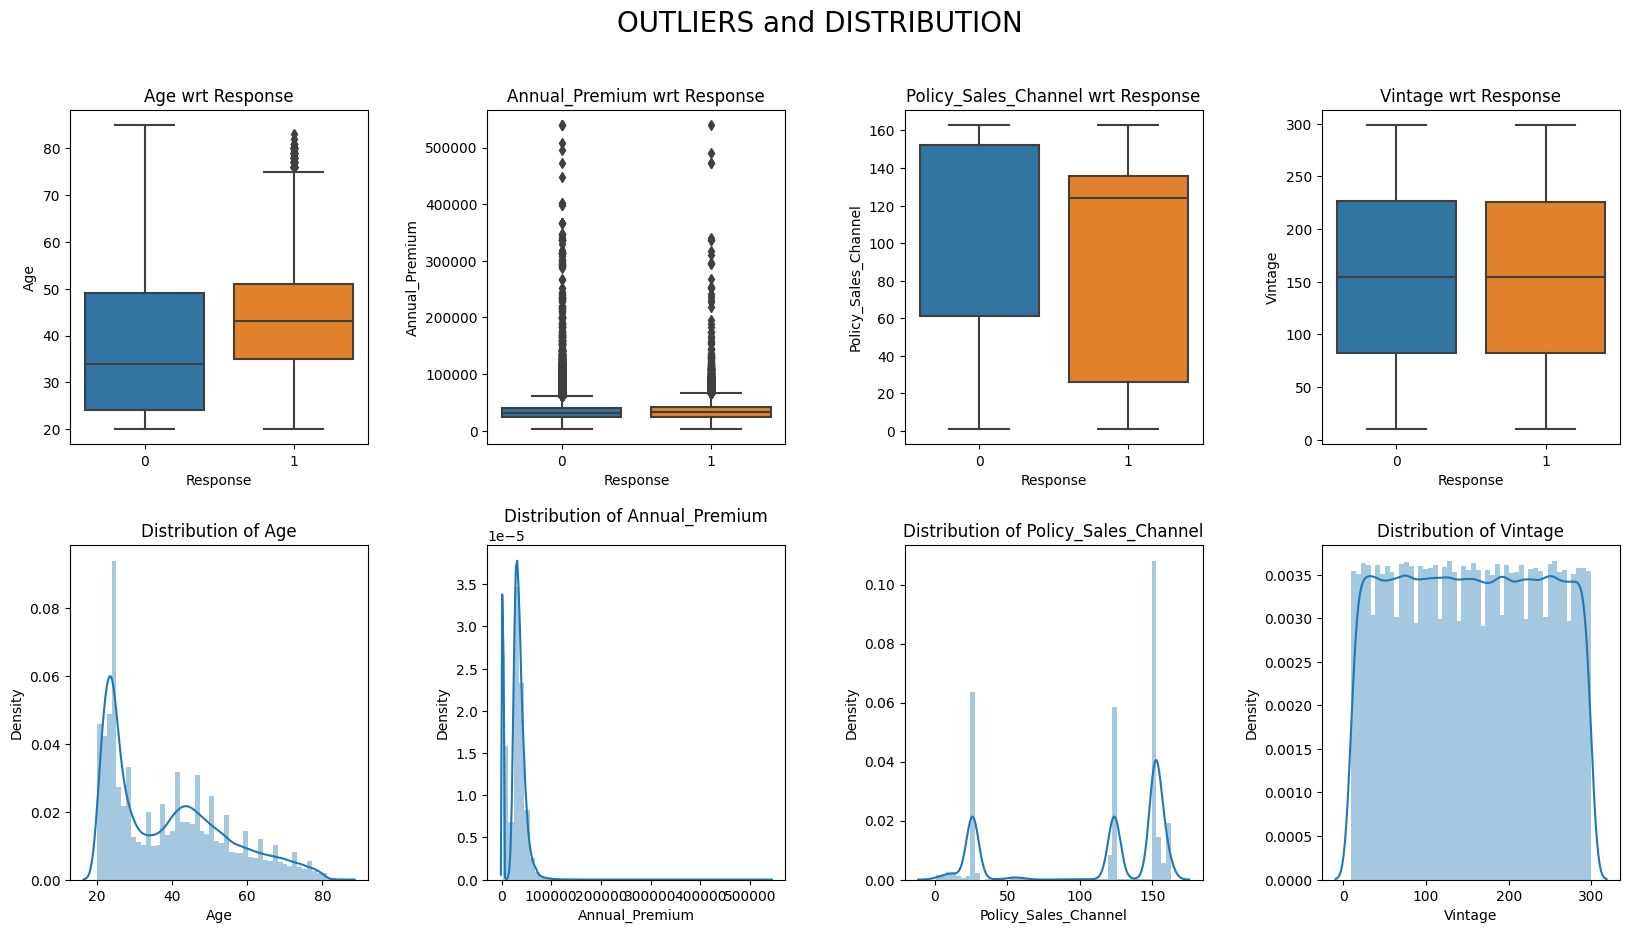

In [13]:
# Plotting boxplot and Distribution plot on the same plane.
index=1
plt.figure(figsize= (20,10))
for i in ["Age","Annual_Premium","Policy_Sales_Channel","Vintage"]:
  plt.subplot(2,4,index)
  index= index+1
  plot_data=df[i]
  sns.boxplot(x=df.Response,y=plot_data)
  plt.title(f'{i} wrt Response')
for i in ["Age","Annual_Premium","Policy_Sales_Channel","Vintage"]:
  plt.subplot(2,4,index)
  index= index+1
  plot_data=df[i]
  sns.distplot(plot_data)
  plt.title(f"Distribution of {i}")
  plt.subplots_adjust(hspace = 0.3, wspace= 0.4)
  plt.suptitle("OUTLIERS and DISTRIBUTION", fontsize=20)

## REMARKS :
> ### For **Age** column, Response-1 has some outliers.
> ### **Annual_Premium** has a lot of outliers.
> ### Column **Age and Annual_Premium** are **Right Skewed**, While Vintage Column is uniformly distributed.

In [14]:
# Creating a Function for removing outliers.
def remove_outliers(data, column):
  q1 = data[column].quantile(0.25)
  q3 = data[column].quantile(0.75)
  iqr = q3-q1
  lower_fence  = q1-1.5*iqr
  upper_fence = q3+1.5*iqr
  # revised_df = data.loc[(data[column] >= lower_fence) & (data[column] <= upper_fence)]
  data[column] = np.where(data[column]>= upper_fence, upper_fence, data[column])
  data[column] = np.where(data[column]<= lower_fence, lower_fence, data[column])
  return data

In [15]:
# Removing outliers from "Annual_Premium" column
df=remove_outliers(df,'Annual_Premium')

### As the Outliers in Age column won't affect the result, we are not treating the outliers of that column.


## Scaling the Data for better interpretation:

In [16]:
# Using MinMaxScaler to scale the data in the range of (0,1).
scaler = MinMaxScaler()

# Treating the required column and assigning a new column to it.
df['Annual_Premium_Treated'] = scaler.fit_transform(df['Annual_Premium'].values.reshape(-1,1))
df['Vintage_Treated'] = scaler.fit_transform(df['Vintage'].values.reshape(-1,1))

<Axes: xlabel='Annual_Premium_Treated', ylabel='Density'>

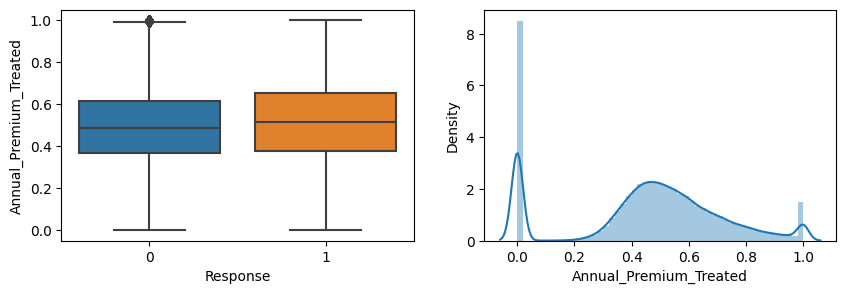

In [17]:
# Let's check the distribution again.
plt.figure(figsize= (10,3))
plt.subplot(1,2,1)
sns.boxplot(y= df.Annual_Premium_Treated, x= df.Response)
plt.subplot(1,2,2)
sns.distplot(df['Annual_Premium_Treated'])

### From the abobe plots we can see that there are less outliers present in Annual Premium now.

# **EXPLORATORY DATA ANALYSIS :**


---



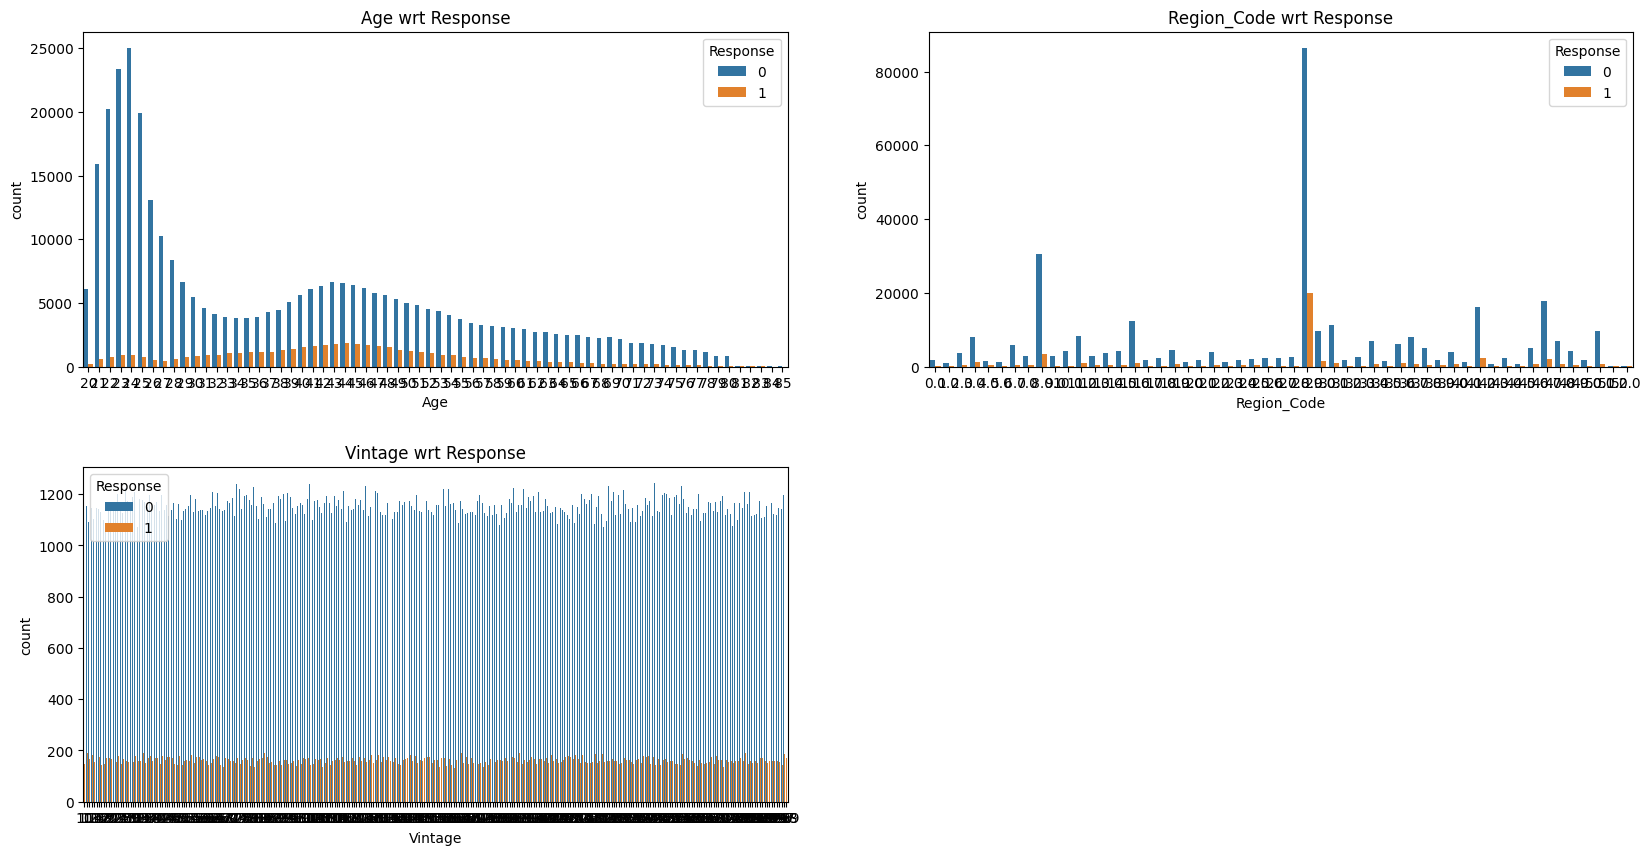

In [18]:
# Let's check Age, Region_Code, Policy_Sales_Channel, Vintage wrt Response
index= 1
plt.figure(figsize= (20,10))
for i in ['Age','Region_Code','Vintage']:
  plt.subplot(2,2,index)
  index +=1
  sns.countplot(x = i, data = df, hue='Response')
  plt.title(f'{i} wrt Response')
  plt.xlabel(i)
  plt.ylabel('count')
  plt.subplots_adjust(hspace = 0.3, wspace= 0.2)

In [19]:
# plt.figure(figsize=(25,12))
# sns.countplot(x=df.Region_Code, hue=df.Response)

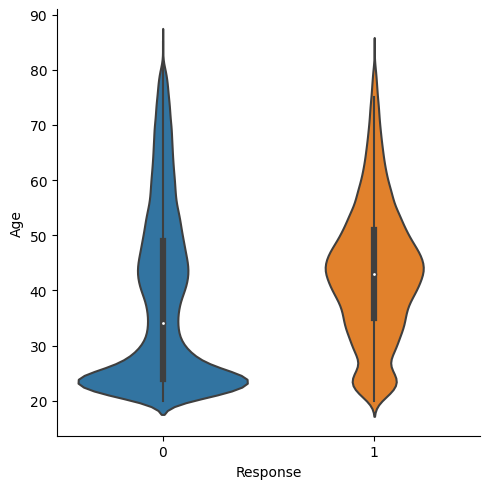

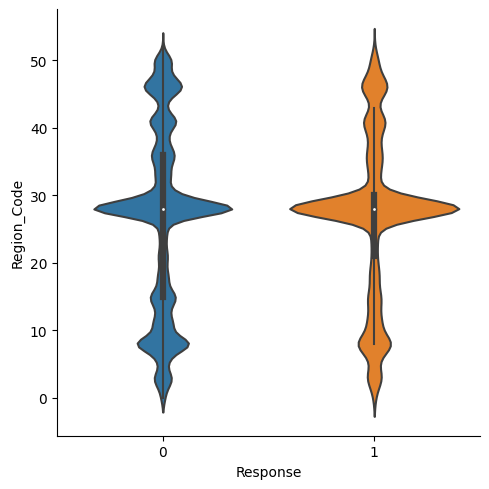

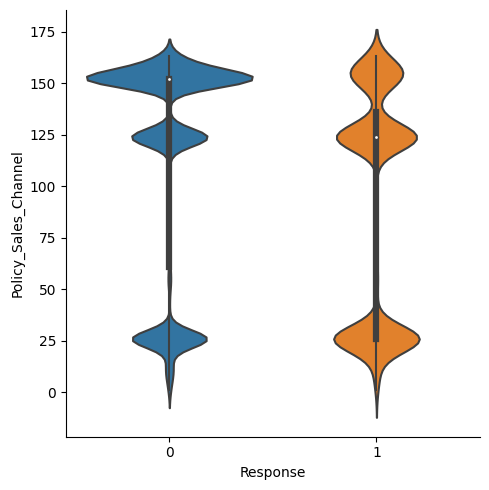

In [20]:
# Using violinplot to Check the data distribution wrt Response.
for i in ['Age','Region_Code','Policy_Sales_Channel']:
  sns.catplot(x= 'Response', y= i, data= df, kind= 'violin')

## REMARKS:
### From above plots we can see that-
> ### Middle aged people are more interested in taking the insurance  compared to the younger people.
> ### Vintage do not affect the interest in taking the Insurance.
> ### In the region having Region_code 28.0, people are more interested in taking the insurance. (This region might be a populated city and people own more vehicles here.)

<Axes: xlabel='Response', ylabel='count'>

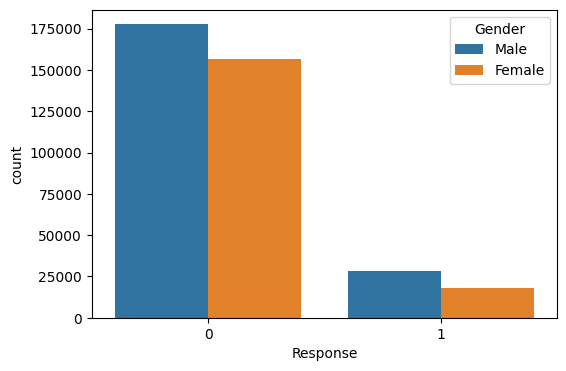

In [21]:
# Checking the Gender count wrt Response.
plt.figure(figsize=(6,4))
sns.countplot(x=df.Response,hue=df.Gender)

In [22]:
# Separating the male and female data.
GM= df[df.Gender=='Male']       # GM= Gender Male
GF= df[df.Gender=='Female']     # GF= Gender Female

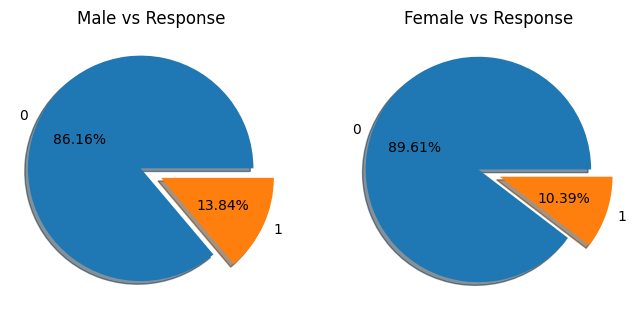

In [23]:
# Using the pie chart to check the Response Percentage of different Gender Group.
fig, ax= plt.subplots(1,2,figsize=(8,5))
explode=[0.1,0.1]
ax[0].pie(GM.Response.value_counts(), labels= GM.Response.value_counts().index, autopct= "%1.2f%%", explode= explode, shadow= True)
ax[0].set_title('Male vs Response')
ax[1].pie(GF.Response.value_counts(), labels= GF.Response.value_counts().index, autopct= "%1.2f%%", explode= explode, shadow= True)
ax[1].set_title('Female vs Response')
plt.show()

## REMARKS :
### From above plots we can conclude that-
> ### In our dataset Male count is more than that of Female count.
> ### Out of the Male and Female population about **14% male** and **10% female** are interested in insurance.

### Categorizing the age column for better interpretation.

In [24]:
# Categorizing the age into 3 groups of young, middle and old age.
df['Age_categorized']= df.Age.apply(lambda x : "Young age" if x <=40 else "Middle age" if 40< x <=60 else "Old age")

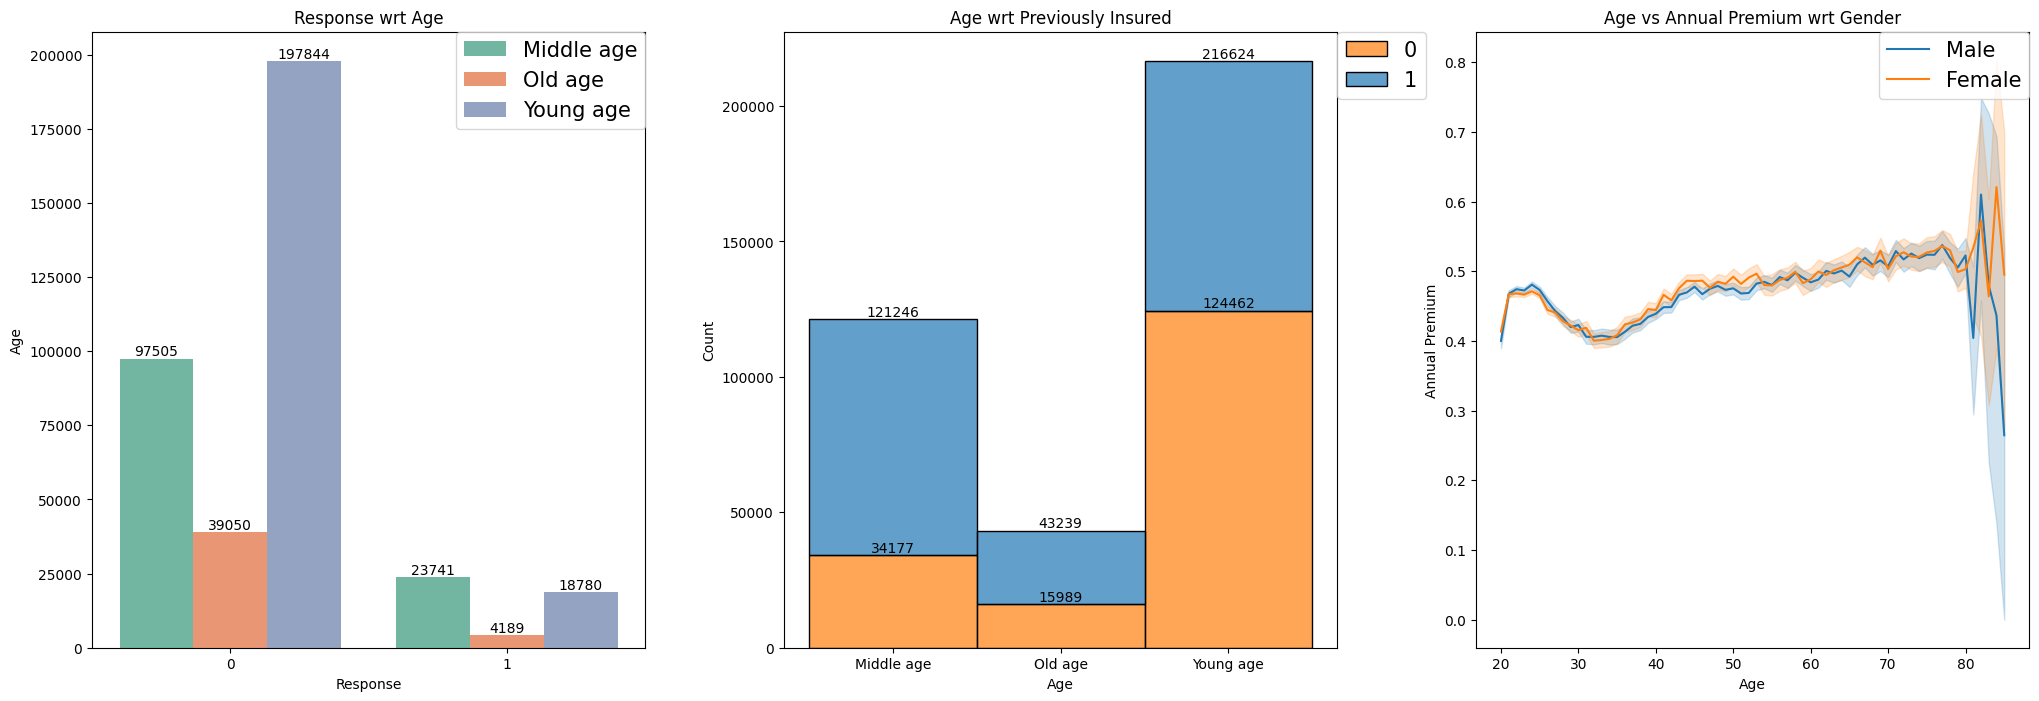

In [25]:
# Checking the Age CAtegory wrt Response, Previously_Insured and Annul_Premium.
fig, ax= plt.subplots(1,3, figsize= (25,8))
sns.countplot(ax=ax[0], x=df.Response, hue=df.Age_categorized, palette='Set2')
ax[0].set_title("Response wrt Age")
ax[0].set_xlabel("Response")
ax[0].set_ylabel("Age")
ax[0].legend(fontsize=15, bbox_to_anchor=(1,1),borderaxespad=0)
for i in ax[0].containers:
    ax[0].bar_label(i)

sns.histplot(ax=ax[1],x=df.Age_categorized, hue=df.Previously_Insured,stat='count', multiple='stack', alpha= 0.7)
ax[1].set_title("Age wrt Previously Insured")
ax[1].set_xlabel("Age")
ax[1].set_ylabel("Count")
ax[1].legend((0,1),fontsize=15,bbox_to_anchor=(1,1),borderaxespad=0)
for i in ax[1].containers:
    ax[1].bar_label(i)

sns.lineplot(ax= ax[2], x= df.Age, y= df.Annual_Premium_Treated, hue= df.Gender)
ax[2].set_title("Age vs Annual Premium wrt Gender")
ax[2].set_xlabel("Age")
ax[2].set_ylabel("Annual Premium")
ax[2].legend(fontsize=15,bbox_to_anchor=(1,1),borderaxespad=0)
plt.subplots_adjust(wspace= 0.25)

## REMARKS:
> ### From the Second plot we can see that most percentage of middle aged people have taken the Insurance before.
> ###  From the third plot we can see that, for people below 80 years old, the yearly premium for both male and female are almost same and for people beyond that age, the yearly premium is high for the females.


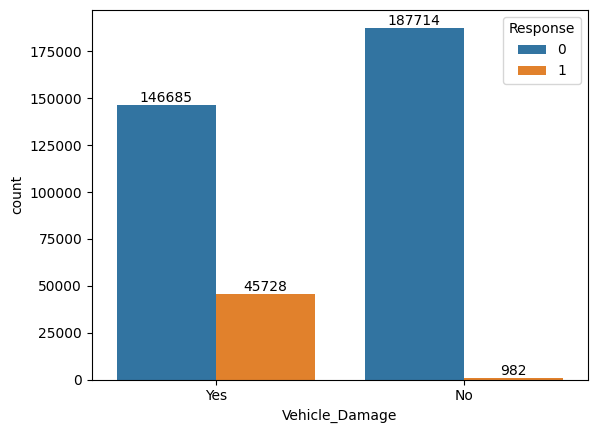

In [26]:
# Checking the Vehicle Damage wrt Response.
fig=sns.countplot(x=df.Vehicle_Damage,hue=df.Response)
for i in fig.containers:
    fig.bar_label(i)

## REMARKS:
> ### Out of 192413, 146685 people  have not taken Insurance even their vehicle got damaged.
> ### Out of 188696 , 982 people have taken the Insurance even their vehicle is not damaged.

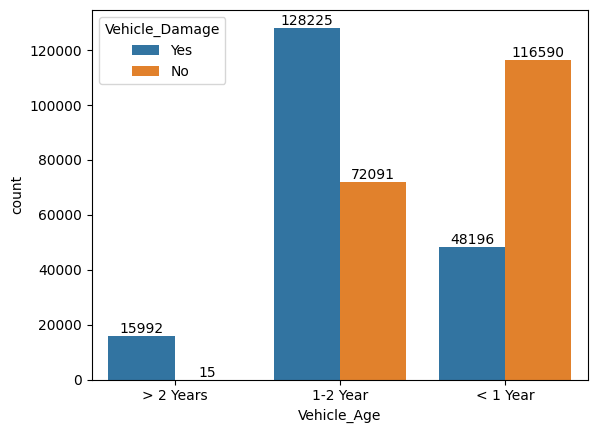

In [27]:
# Checking the Vehicle Age wrt Vehicle Damage.
fig=sns.countplot(x=df['Vehicle_Age'], hue=df['Vehicle_Damage'])
for i in fig.containers:
    fig.bar_label(i)

##REMARKS:
> ### With increase in vehicle age, the ratio of damaged to the undamaged vehicle is increasing.

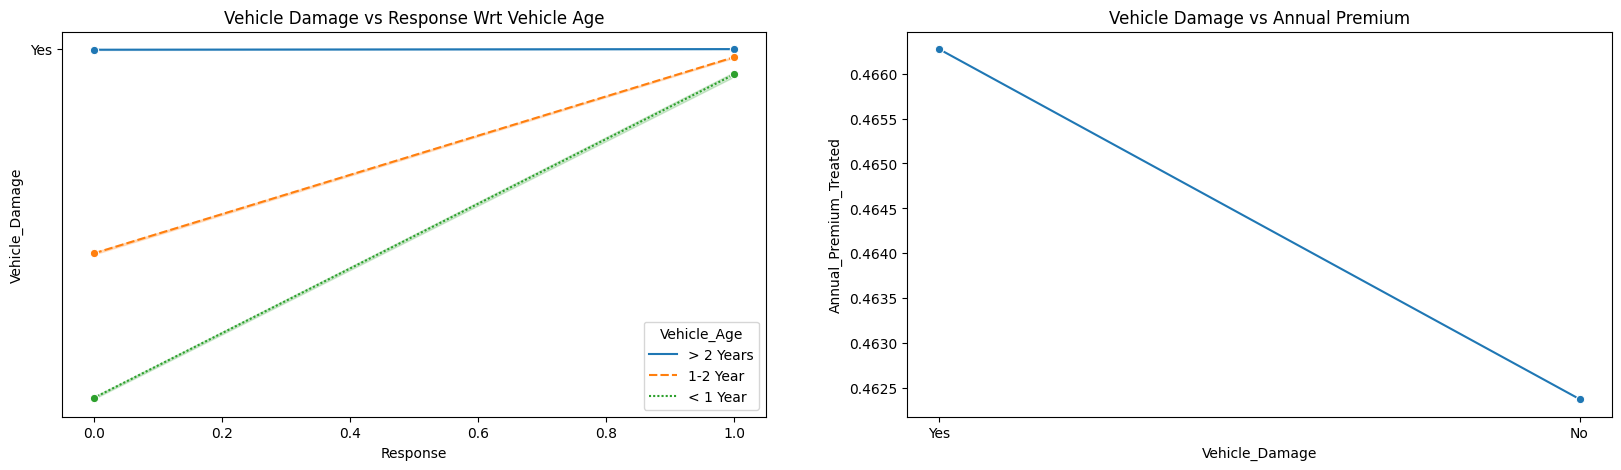

In [28]:
# Checking the relation between Vehicle Age, Vehicle Damage, Vehicle Response and Annual Premium.
fig, ax= plt.subplots(1,2, figsize= (20,5))
sns.lineplot(ax= ax[0], x=df.Response,y=df.Vehicle_Damage, hue=df.Vehicle_Age, marker="o", style=df.Vehicle_Age)
ax[0].set_title('Vehicle Damage vs Response Wrt Vehicle Age')

sns.lineplot(ax= ax[1], x=df.Vehicle_Damage, y= df.Annual_Premium_Treated, ci= None, marker= 'o')
ax[1].set_title('Vehicle Damage vs Annual Premium')
plt.show()

## REMARKS :
>### From the first plot we can see that, irrespective of Vehicle Age, people are interested in taking Insurance when their vehicle is damaged.
>### From second plot we can conclude that Annual Premium is comparatively high for those having Vehicle Damaged.

### Categorizing Region_Code Column according to value_counts

In [29]:
# Getting the value_counts of Region_Code Column.
Region_code_value_counts_df= df.Region_Code.value_counts()

In [30]:
# Converting the Counts and correesponding Values to a Dictionary.
code_value_dict= Region_code_value_counts_df.to_dict()

In [31]:
# Assigning the Category to the counts by their range.
for i,j in code_value_dict.items():
  if j >=100000:
    code_value_dict[i]= 'Region_1'
  elif 10000<= j <100000:
    code_value_dict[i]= 'Region_2'
  else:
    code_value_dict[i]='Region_3'

In [32]:
# Mapping the Categories.
df['Region_Code_Categorized']= df.Region_Code.map(code_value_dict)

### Categorizing Policy_Sales_Channel Column according to value_counts

In [33]:
# Getting the value_counts of Policy_Sales_Channel Column.
Policy_Sales_value_counts_df= df.Policy_Sales_Channel.value_counts()

In [34]:
# Converting the Counts and correesponding Values to a Dictionary.
Policy_Sales_value_dict= Policy_Sales_value_counts_df.to_dict()

In [35]:
# Assigning the Category to the counts by their range.
for i,j in Policy_Sales_value_dict.items():
  if j >=100000:
    Policy_Sales_value_dict[i]= 'Channel_1'
  elif 50000<= j <100000:
    Policy_Sales_value_dict[i]= 'Channel_2'
  else:
    Policy_Sales_value_dict[i]='Channel_3'

In [36]:
# Mapping the Categories.
df['Policy_Sales_Categorized']= df.Policy_Sales_Channel.map(Policy_Sales_value_dict)

In [37]:
# Checking the Sample of Revised Data Frame.
df.sample(5)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Annual_Premium_Treated,Vintage_Treated,Age_categorized,Region_Code_Categorized,Policy_Sales_Categorized
140237,Male,21,1,47.0,0,< 1 Year,No,2630.0,152.0,52,0,0.000000,0.145329,Young age,Region_3,Channel_1
23224,Male,24,1,16.0,1,< 1 Year,No,2630.0,152.0,154,0,0.000000,0.498270,Young age,Region_3,Channel_1
294342,Male,41,1,31.0,0,1-2 Year,Yes,2630.0,26.0,133,0,0.000000,0.425606,Middle age,Region_3,Channel_2
236312,Female,26,1,36.0,1,< 1 Year,No,28047.0,152.0,255,0,0.428888,0.847751,Young age,Region_3,Channel_1
360720,Female,55,1,8.0,0,1-2 Year,Yes,44432.0,124.0,132,0,0.705370,0.422145,Middle age,Region_2,Channel_2


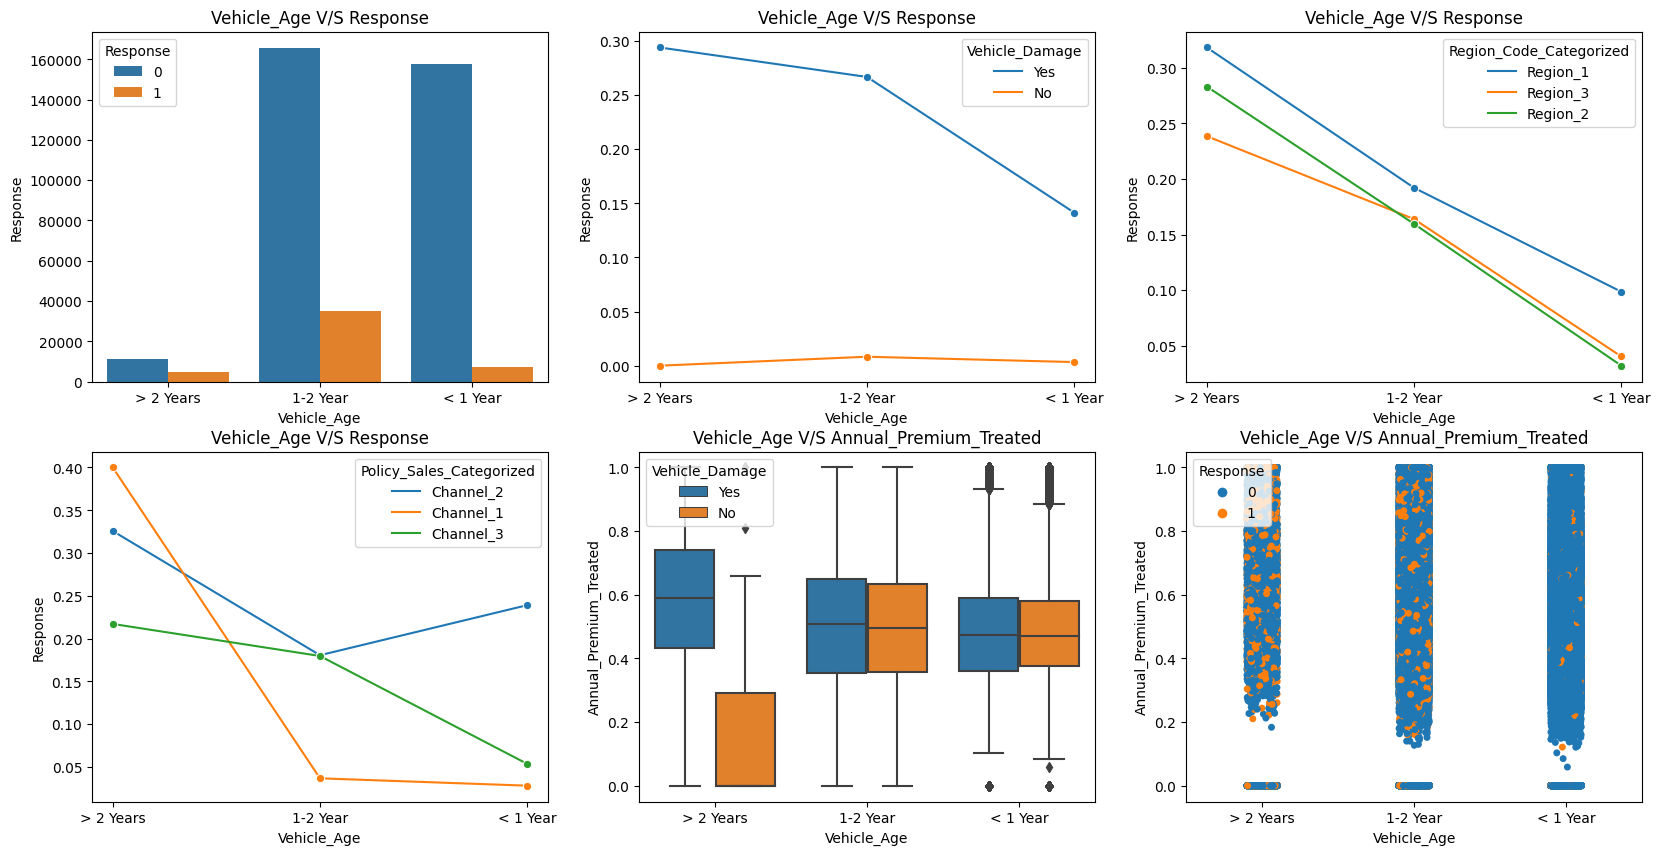

In [38]:
# Checking Vehicle_Age vs Response wrt Vehicle_Damage, Region_Code_Categorized and Policy_Sales_Categorized.
fig, ax = plt.subplots(2,3, figsize=(20,10))

sns.countplot(ax = ax[0][0], x = df.Vehicle_Age,  hue=df.Response)
ax[0][0].set_xlabel(xlabel = 'Vehicle_Age')
ax[0][0].set_ylabel(ylabel = 'Response')
ax[0][0].set_title('Vehicle_Age V/S Response')

sns.lineplot(ax = ax[0][1], y= df.Response, x= df.Vehicle_Age, hue = df.Vehicle_Damage, ci= None, marker= 'o')
ax[0][1].set_xlabel(xlabel = 'Vehicle_Age')
ax[0][1].set_ylabel(ylabel = 'Response')
ax[0][1].set_title('Vehicle_Age V/S Response')

sns.lineplot(ax = ax[0][2], y = df.Response, x = df.Vehicle_Age, hue = df.Region_Code_Categorized, ci= None, marker='o')
ax[0][2].set_xlabel(xlabel = 'Vehicle_Age')
ax[0][2].set_ylabel(ylabel = 'Response')
ax[0][2].set_title('Vehicle_Age V/S Response')

sns.lineplot(ax = ax[1][0], y = df.Response, x = df.Vehicle_Age, hue = df.Policy_Sales_Categorized, ci= None, marker='o')
ax[1][0].set_xlabel(xlabel = 'Vehicle_Age')
ax[1][0].set_ylabel(ylabel = 'Response')
ax[1][0].set_title('Vehicle_Age V/S Response')

# Checking Vehicle_Age vs Annual_Premium_Treated wrt Vehicle_Damage and Response.
sns.boxplot(ax = ax[1][1], y = df.Annual_Premium_Treated, x = df.Vehicle_Age, hue = df.Vehicle_Damage)
ax[1][1].set_xlabel(xlabel = 'Vehicle_Age')
ax[1][1].set_ylabel(ylabel = 'Annual_Premium_Treated')
ax[1][1].set_title('Vehicle_Age V/S Annual_Premium_Treated')

sns.stripplot(ax = ax[1][2], y = df.Annual_Premium_Treated, x = df.Vehicle_Age, hue = df.Response)
ax[1][2].set_xlabel(xlabel = 'Vehicle_Age')
ax[1][2].set_ylabel(ylabel = 'Annual_Premium_Treated')
ax[1][2].set_title('Vehicle_Age V/S Annual_Premium_Treated')

plt.show()

## REMARKS :
>### 1. From first plot we can see that the vehicles of age 1-2 year have been Insured more.
>### 2. From the second plot we concluded that Response is directly proportional to Vehicle Age and Vehicle Damage.
>### 3. From the third plot we observed that the Response is high in Region_1.
>### 4. From the fourth plot we find that for vehicle of age 0-2 years, Channel_2 is more efficient while the Channel_1 becomes more efficient for the vehicles of age more than 2 years.
>### 5. From the fifth plot shows us the distribution of Annual_Premium distribution wrt Vehicle_Age.
>### 6. From sixth plot we inferred that Insured vehicles of age more than two years have high Annual Premium.

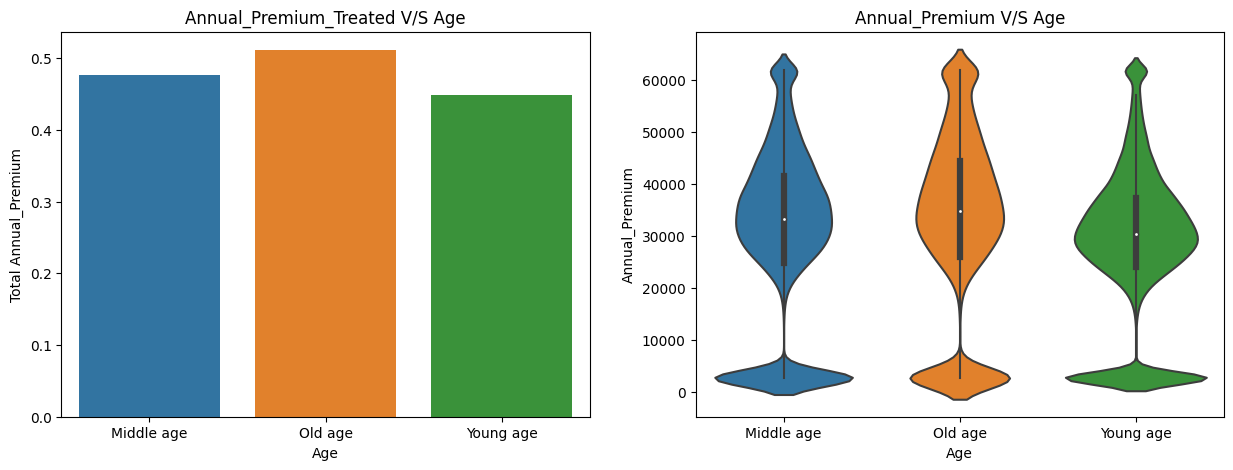

In [39]:
# Checking Annual_Premium vs Age.
fig, ax = plt.subplots(1,2, figsize=(15,5))

sns.barplot(ax= ax[0], y= df.groupby('Age_categorized')['Annual_Premium_Treated'].mean(),
            x= df.groupby('Age_categorized')['Annual_Premium_Treated'].mean().index)
ax[0].set_xlabel(xlabel = 'Age')
ax[0].set_ylabel(ylabel = 'Total Annual_Premium')
ax[0].set_title('Annual_Premium_Treated V/S Age')

sns.violinplot(ax = ax[1], y = df.Annual_Premium, x = df.Age_categorized)
ax[1].set_xlabel(xlabel = 'Age')
ax[1].set_ylabel(ylabel = 'Annual_Premium')
ax[1].set_title('Annual_Premium V/S Age')
plt.subplots_adjust(wspace= 0.2)

## REMARKS :
>### The above barplot shows that, Average Annual Premium for Old age people is high compared to others.
>### The Violinplot shows that, most of the people have Annual Premium ranging from 25000 to 40000 for every age group.

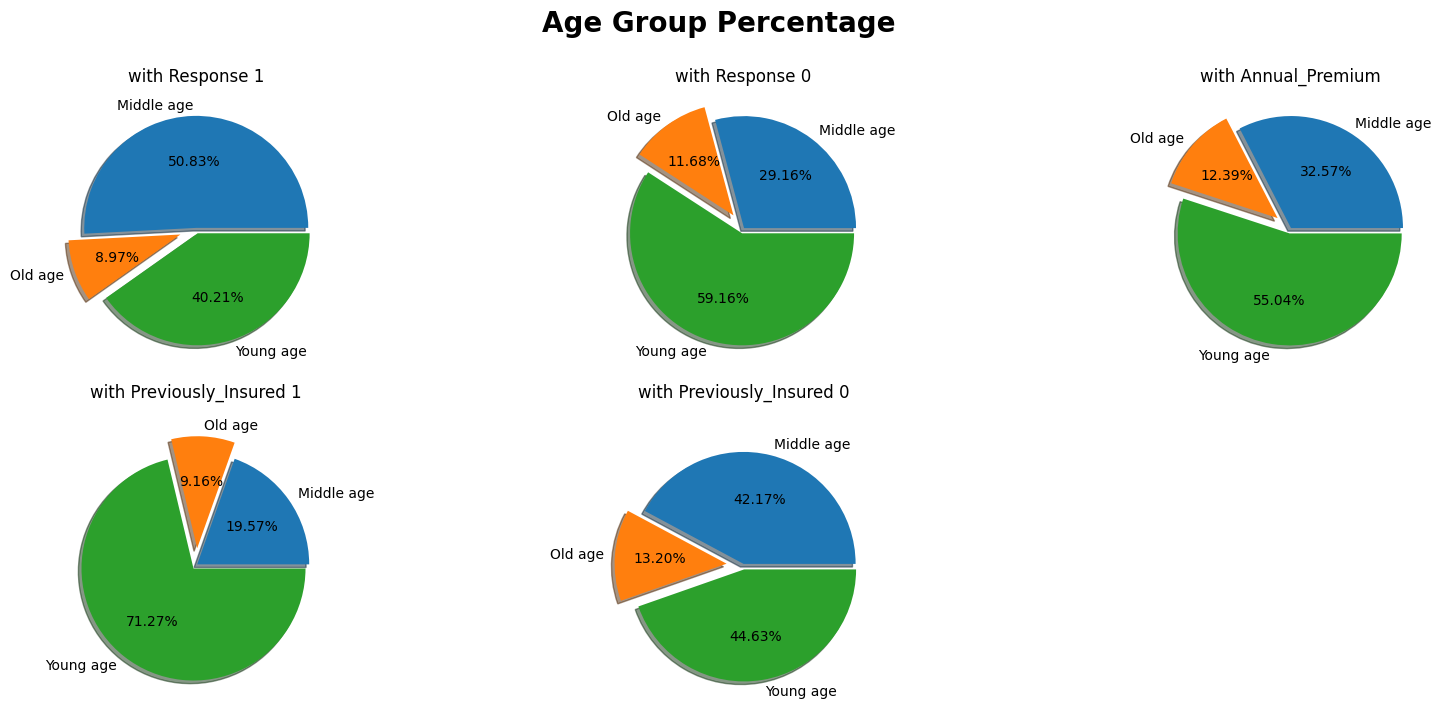

In [40]:
fig, ax = plt.subplots(2,3, figsize=(20,8))

explode = (0.01, 0.15, 0.04)
df[df['Response']==1].groupby('Age_categorized')['Response'].count().plot(kind='pie',
                    ax=ax[0][0],explode=explode, labels=df.Age_categorized.unique(), autopct='%1.2f%%', shadow=True)
ax[0][0].set_ylabel(None)
ax[0][0].set_title('with Response 1')

df[df['Response']==0].groupby('Age_categorized')['Response'].count().plot(kind='pie',
                      ax=ax[0][1],explode=explode, labels=df.Age_categorized.unique(), autopct='%1.2f%%', shadow=True)
ax[0][1].set_ylabel(None)
ax[0][1].set_title('with Response 0')

ax[0][2].pie(x=df.groupby('Age_categorized')['Annual_Premium'].sum(),explode=explode,
        labels=df.Age_categorized.unique(), autopct='%1.2f%%',
        shadow=True);
ax[0][2].set_title('with Annual_Premium')

df[df["Previously_Insured"]==1].groupby('Age_categorized')['Previously_Insured'].count().plot(kind='pie',
                              ax=ax[1][0],explode=explode, labels=df.Age_categorized.unique(), autopct='%1.2f%%', shadow=True)
ax[1][0].set_ylabel(None)
ax[1][0].set_title('with Previously_Insured 1', pad=20)

df[df["Previously_Insured"]==0].groupby('Age_categorized')['Previously_Insured'].count().plot(kind='pie',
                                ax=ax[1][1],explode=explode, labels=df.Age_categorized.unique(), autopct='%1.2f%%', shadow=True);
ax[1][1].set_title('with Previously_Insured 0', pad=20)
ax[1][1].set_ylabel(None)

plt.suptitle('Age Group Percentage',fontsize = 20, fontweight ='bold')
fig.delaxes(ax[1][2])
plt.show()

## REMARKS :
>### 1. From first plot we can see that Middle age , old age and young age people are leaned towards taking the insurance are about 51%, 9% and 40% respectively.
>### 2. From second plot we can see that Middle age , old age and young age people are not interested in taking the insurance are about 29%, 12% and 59% respectively.
>### 3. From third plot we can see that the Annual_Premium for Middle age and old age and young age people are 33%, 12% and 55% respectively.
>### 4. From fourth plot we can see that 9% of old age, 20% of middle age and 71% of young age people are previously insured.
>### 5. From fifth plot we can see that 13% of old age, 42% of middle age and 45% of young age people are not previously insured.


Text(0.5, 0.98, 'Region Code Percentage')

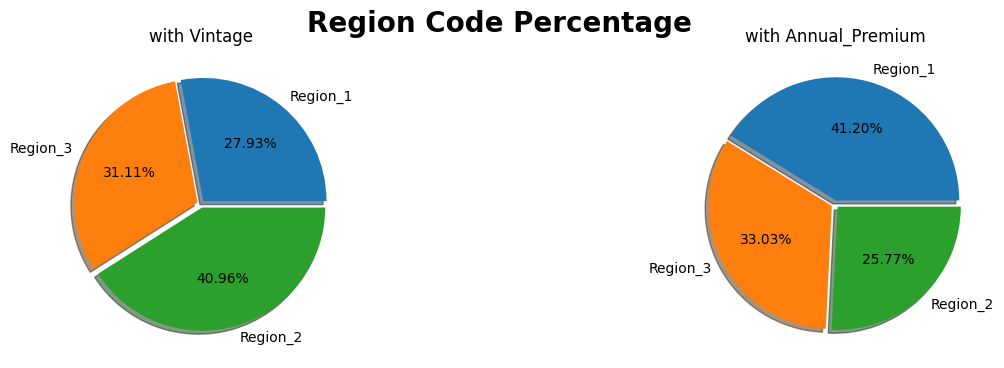

In [41]:
fig, ax = plt.subplots(1,2, figsize=(15,4))
explode = (0.03, 0.03, 0.03)

ax[0].pie(x=df.groupby('Region_Code_Categorized')['Vintage_Treated'].sum(),explode=explode,
            labels=df['Region_Code_Categorized'].unique(),autopct='%1.2f%%', shadow=True);
ax[0].set_title('with Vintage')

ax[1].pie(x=df.groupby('Region_Code_Categorized')['Annual_Premium_Treated'].mean(),explode=explode,
            labels=df['Region_Code_Categorized'].unique(), autopct='%1.2f%%', shadow=True);
ax[1].set_title('with Annual_Premium')

plt.suptitle('Region Code Percentage', fontsize=20, fontweight= 'bold')

## REMARKS :
>### From the first plot we can see that in Region-2 People are more associated with the company.
>### From the second plot we can conclude that the annual premium for the people in the Region-1 is more compared to others.


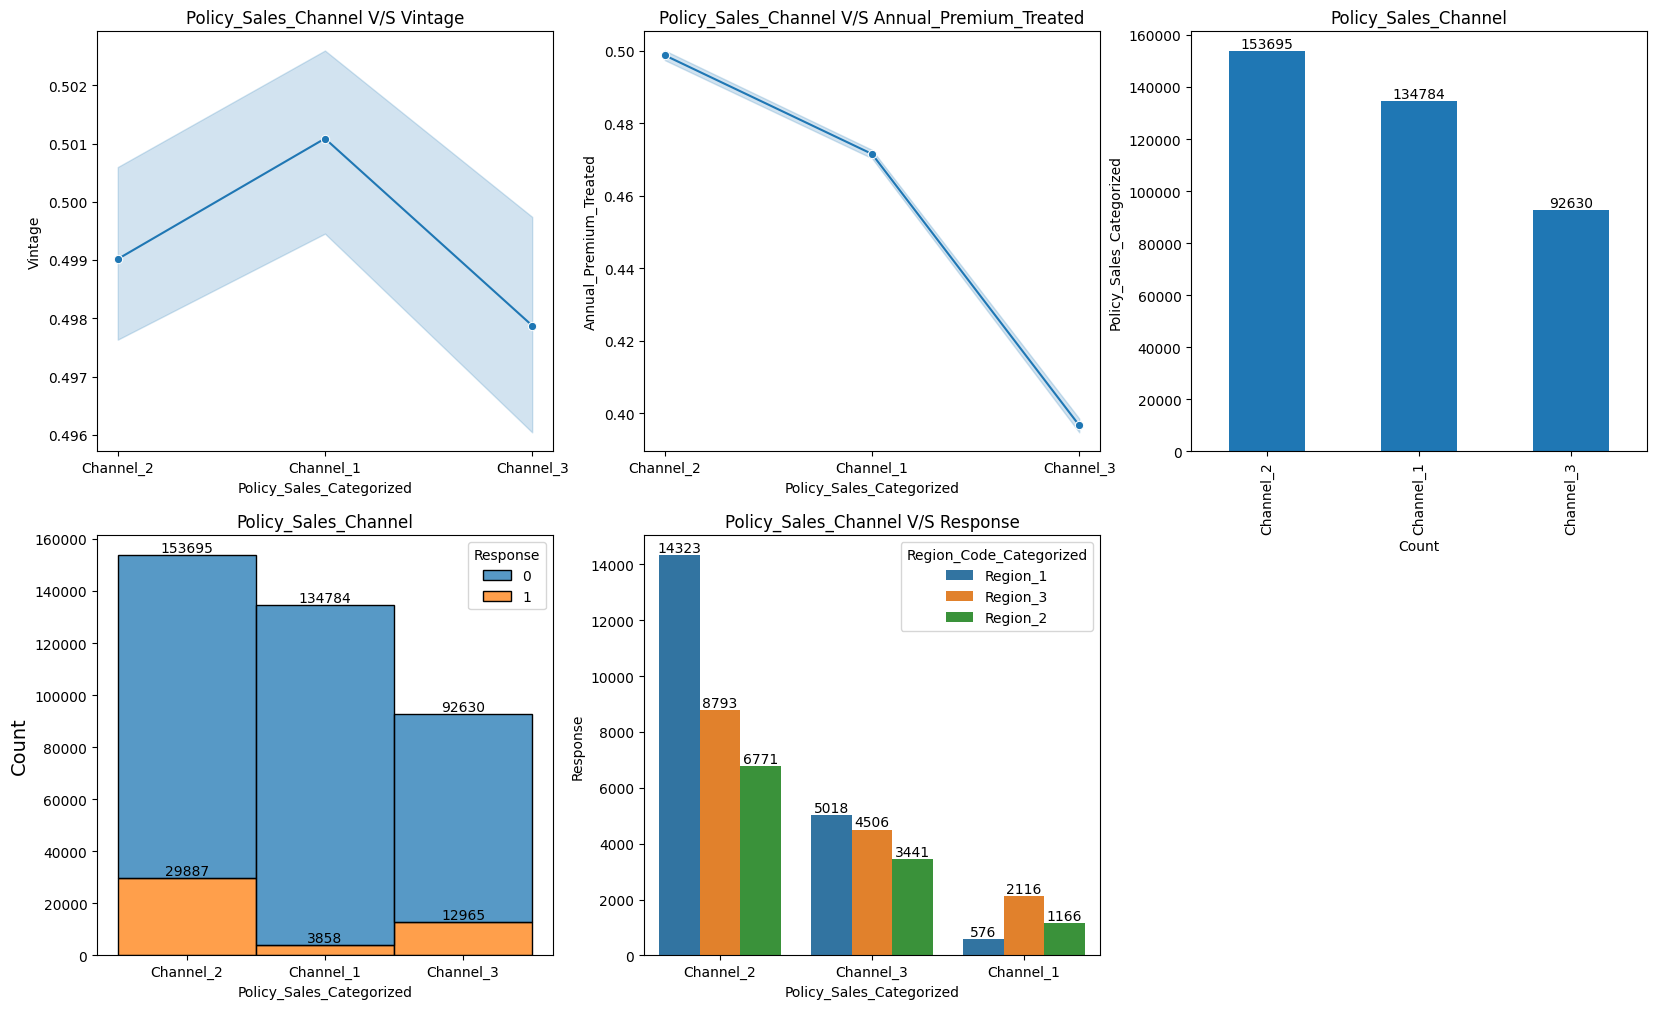

In [42]:
fig, ax = plt.subplots(2,3, figsize=(20,12))

sns.lineplot(ax = ax[0][0], x=df.Policy_Sales_Categorized, y=df.Vintage_Treated, marker= 'o')
ax[0][0].set_xlabel(xlabel = 'Policy_Sales_Categorized')
ax[0][0].set_ylabel(ylabel = 'Vintage')
ax[0][0].set_title('Policy_Sales_Channel V/S Vintage')

sns.lineplot(ax = ax[0][1], x=df.Policy_Sales_Categorized, y=df.Annual_Premium_Treated, marker= 'o')
ax[0][1].set_xlabel(xlabel = 'Policy_Sales_Categorized')
ax[0][1].set_ylabel(ylabel = 'Annual_Premium_Treated')
ax[0][1].set_title('Policy_Sales_Channel V/S Annual_Premium_Treated')

df['Policy_Sales_Categorized'].value_counts().plot(ax = ax[0][2] ,kind='bar')
ax[0][2].set_xlabel(xlabel = 'Count')
ax[0][2].set_ylabel(ylabel = 'Policy_Sales_Categorized')
ax[0][2].set_title('Policy_Sales_Channel')
for i in ax[0][2].containers:
    ax[0][2].bar_label(i)

sns.histplot(ax = ax[1][0],x=df.Policy_Sales_Categorized, hue=df.Response,  stat="count", multiple="stack",binwidth=0.5)
ax[1][0].set_xlabel(xlabel = 'Policy_Sales_Categorized')
ax[1][0].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
ax[1][0].set_title('Policy_Sales_Channel')
for i in ax[1][0].containers:
    ax[1][0].bar_label(i)

sns.countplot(ax= ax[1][1], x=df[df.Response==1].Policy_Sales_Categorized, hue= df.Region_Code_Categorized)
ax[1][1].set_xlabel(xlabel = 'Policy_Sales_Categorized')
ax[1][1].set_ylabel(ylabel = 'Response')
ax[1][1].set_title('Policy_Sales_Channel V/S Response')
for i in ax[1][1].containers:
    ax[1][1].bar_label(i)

fig.delaxes(ax[1][2])


## REMARKS:
>### From the first plot we see that the channel-1 has high Vintage.
>### From the second plot we can see that Annual Premium is high for channel-2, and least for Channel-3.
>### From the third plot we observed that Channel-2 has high policy sales.
>### From the fourth plot we concluded that in the Channel-2 the percentage of response of buying the insurance is more compared to other channels.
>### From the fifth plot, we can conclude that in Region-1 the sales are through Channel-2 and Channel-3.


# DATA PREPARATION:

---



## Dropping the unnecessary Columns.

In [43]:
df.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response', 'Annual_Premium_Treated',
       'Vintage_Treated', 'Age_categorized', 'Region_Code_Categorized',
       'Policy_Sales_Categorized'],
      dtype='object')

### As we have treated Vintage and Annual Premium, so we can drop these 2 columns.

In [44]:
df.drop(columns=['Vintage','Annual_Premium'], axis=1, inplace= True)

### As we have categorized Age, Region Code, Policy Sales Channel , we can drop these columns.

In [45]:
df.drop(columns=['Region_Code','Policy_Sales_Channel','Age'], inplace= True, axis=1)

In [46]:
# We can also drop 'Driving_License' as it is not providing any valuable information.
df.drop(columns=['Driving_License'], axis=1, inplace=True)

## Converting Categorical variables into Numerical variables.

In [47]:
new_df= df.copy()

In [48]:
new_df.Gender=new_df.Gender.apply(lambda x : 1 if x=='Male' else 0)

In [49]:
new_df.Vehicle_Damage=new_df.Vehicle_Damage.apply(lambda x: 1 if x=='Yes' else 0)

In [50]:
new_df.Vehicle_Age=new_df.Vehicle_Age.apply(lambda x : 0 if x=='< 1 Year' else 1 if x=='1-2 Year' else 2)

### One hot Encoding:

In [51]:
columns=['Age_categorized','Policy_Sales_Categorized', 'Region_Code_Categorized']
new_df=pd.get_dummies(new_df, columns=columns)

In [52]:
new_df.head()

,Gender,Previously_Insured,Vehicle_Age,Vehicle_Damage,Response,Annual_Premium_Treated,Vintage_Treated,Age_categorized_Middle age,Age_categorized_Old age,Age_categorized_Young age,Policy_Sales_Categorized_Channel_1,Policy_Sales_Categorized_Channel_2,Policy_Sales_Categorized_Channel_3,Region_Code_Categorized_Region_1,Region_Code_Categorized_Region_2,Region_Code_Categorized_Region_3
0,1,0,2,1,1,0.638245,0.716263,1,0,0,0,1,0,1,0,0
1,1,0,1,0,0,0.521510,0.598616,0,1,0,0,1,0,0,0,1
2,1,0,2,1,1,0.601797,0.058824,1,0,0,0,1,0,1,0,0
3,1,1,0,0,0,0.438540,0.667820,0,0,1,1,0,0,0,0,1
4,0,1,0,0,0,0.419591,0.100346,0,0,1,1,0,0,0,1,0


In [53]:
new_df.Vehicle_Age.unique()

array([2, 1, 0])

<Axes: >

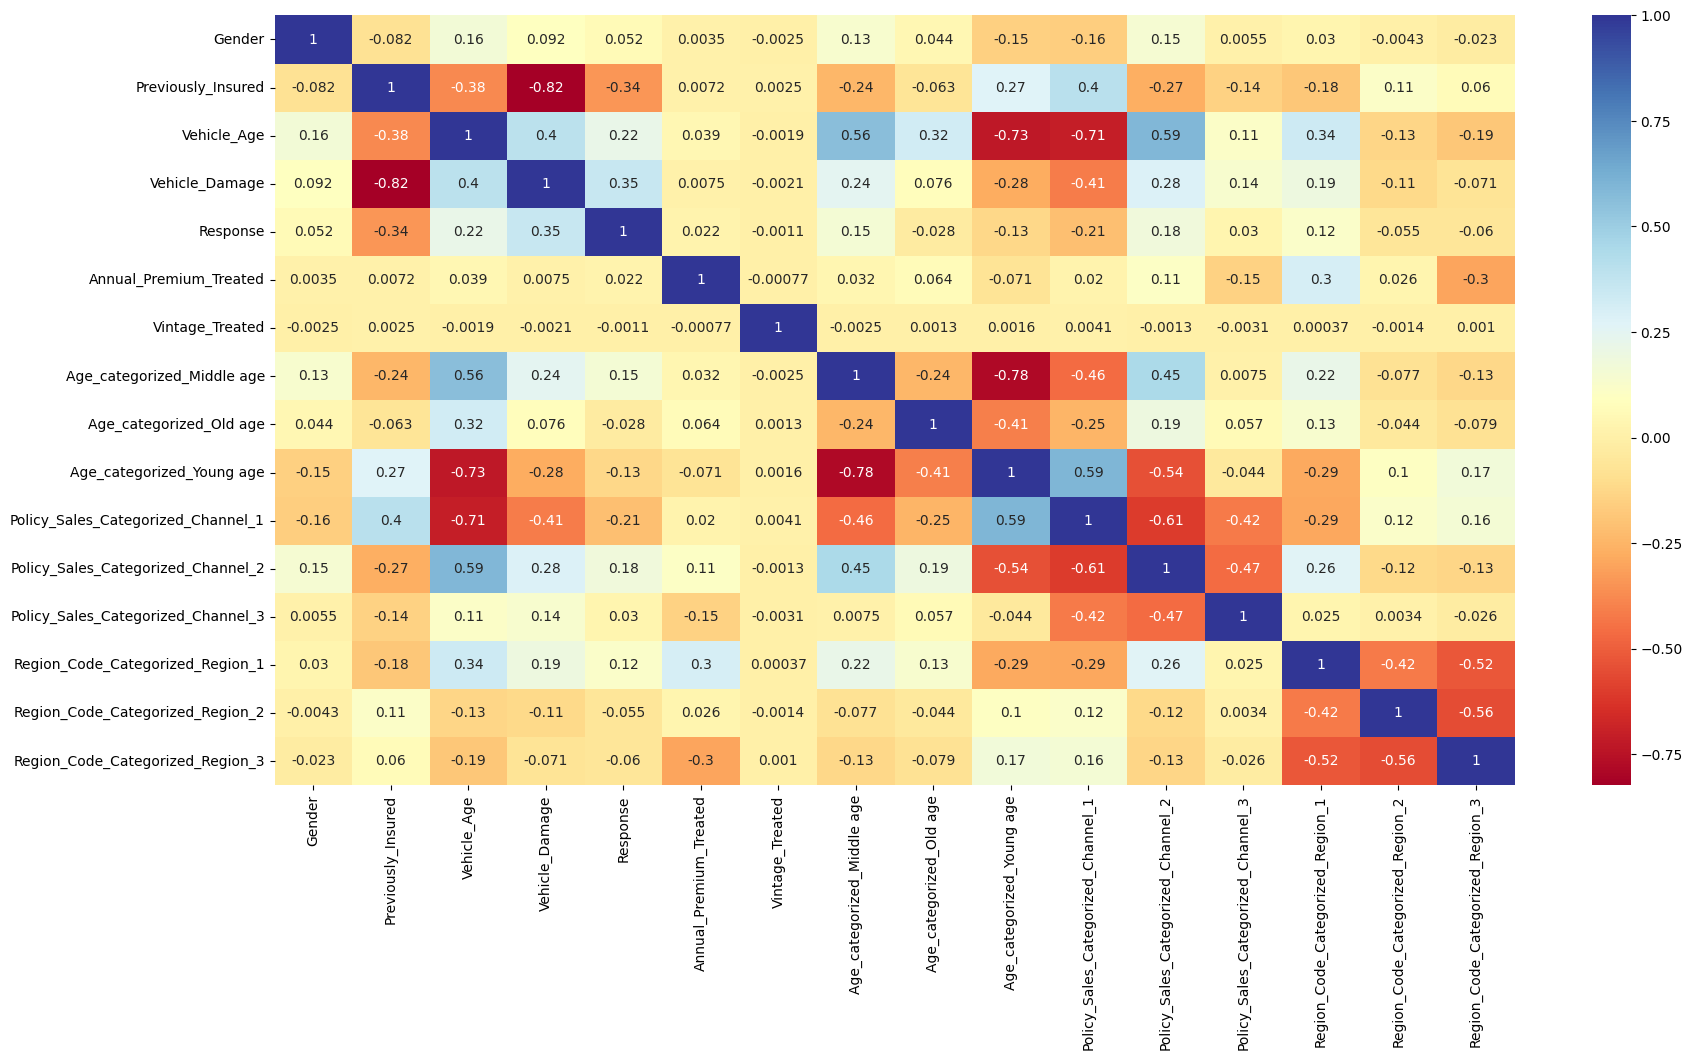

In [54]:
# Let's check the correlation between the columns.
plt.figure(figsize=(20,10))
sns.heatmap(new_df.corr(), annot=True, cmap='RdYlBu')

## Checking the Feature importance:


In [55]:
X = new_df.copy()
y = X.pop("Response")

x_train, x_test, y_train, y_test=train_test_split(X,y,test_size=0.2)

high_score_features = []
feature_scores = mutual_info_classif( x_train, y_train,  random_state=0)

col_score = {}
col = []
score = []
for i, j in sorted(zip(feature_scores, x_train.columns), reverse=True):
  col.append(j)
  score.append(i)
  high_score_features.append(j)

col_score['Feature'] = col
col_score['Score'] = score

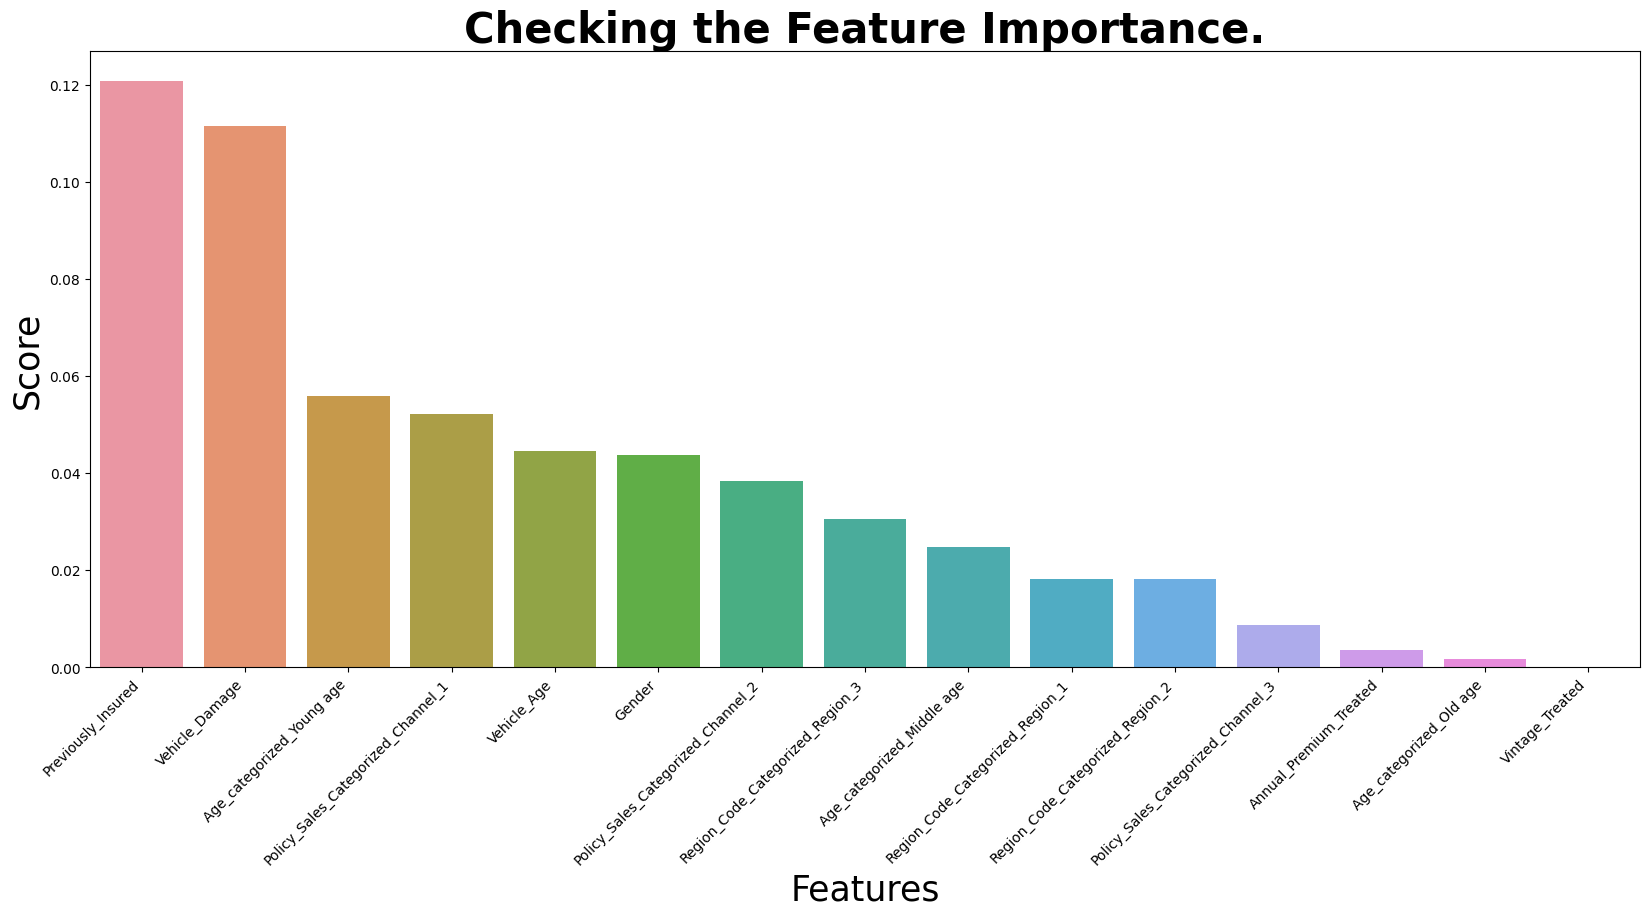

In [56]:
plt.figure(figsize=(20,8))
fig= sns.barplot(x= col_score['Feature'], y=col_score['Score'])
fig.set_xticklabels(labels= col_score['Feature'], rotation=45, ha='right')
fig.set_title("Checking the Feature Importance.", fontsize=30, fontweight= "bold")
fig.set_xlabel("Features", fontsize=25)
fig.set_ylabel("Score",  fontsize=25)
plt.show()

## REMARKS :
>### From the above plot we concluded that **Previously insured** and **Vehicle damage** are the two most important Features.


### Checking Class Imbalance :

In [57]:
# Class count
class_count_0, class_count_1 = new_df['Response'].value_counts()

# Separate class
Response_0 = new_df[new_df['Response'] == 0]
Response_1 = new_df[new_df['Response'] == 1]
print('Response 0:', Response_0.shape)
print('Response 1:', Response_1.shape)

Response 0: (334399, 16)
Response 1: (46710, 16)


### Here we can clearly see that our dataset has **class-imbalance**.
###  As the data set is small so undersampling is not recommended. Therefore we are going to perform **Oversampling**.

In [58]:
# Imoporting the SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(new_df.iloc[:,0:-1], new_df['Response'])

print('Original dataset shape', len(new_df))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 381109
Resampled dataset shape 668798


In [59]:
x_smote.Response.value_counts(), y_smote.value_counts()


(1    334399
 0    334399
 Name: Response, dtype: int64,
 1    334399
 0    334399
 Name: Response, dtype: int64)

### Here we successfully handled class imbalance using the **SMOTE** technique.

## Choosing the Independent and Dependent variable :

---



In [60]:
# Choosing the Dependent variable
y=y_smote

In [61]:
# Choosing the Independent variables :
x=x_smote.drop(columns='Response', axis=1)

## Training and testing the Data :

---



In [62]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=0)

In [63]:
x_train.shape, x_test.shape

((535038, 14), (133760, 14))

In [64]:
y_train.shape, y_test.shape

((535038,), (133760,))

In [65]:
y_train.value_counts(), y_test.value_counts()

(1    267589
 0    267449
 Name: Response, dtype: int64,
 0    66950
 1    66810
 Name: Response, dtype: int64)

## IMPLEMENTING LOGISTIC REGRESSION :

---



In [66]:
lr = LogisticRegression(fit_intercept=True, max_iter=10000)
lr.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

In [67]:
lr.coef_

array([[ 0.09534076, -4.46592058,  0.43392077,  1.94945911,  0.01984335,
        -0.02831926, -0.23059181, -1.00075055,  0.04718555, -0.84567245,
        -0.02972987, -0.30987599,  0.22125093,  0.04272943]])

In [68]:
lr.intercept_

array([-1.18732522])

## Evaluating the performance of the trained model :

In [131]:
# Get the predicted probabilities
train_preds_prob_lr = lr.predict_proba(x_train)
test_preds_prob_lr = lr.predict_proba(x_test)

In [132]:
test_preds_prob_lr

array([[0.22233853, 0.77766147],
       [0.96437384, 0.03562616],
       [0.99643574, 0.00356426],
       ...,
       [0.35476683, 0.64523317],
       [0.51343239, 0.48656761],
       [0.99750351, 0.00249649]])

In [109]:
# Get the predicted classes
train_class_preds_lr = lr.predict(x_train)
test_class_preds_lr = lr.predict(x_test)

In [110]:
test_class_preds_lr

array([1, 0, 0, ..., 1, 0, 0])

In [111]:
# Get the accuracy scores
train_accuracy_lr= accuracy_score(train_class_preds_lr,y_train)
test_accuracy_lr = accuracy_score(test_class_preds_lr,y_test)

In [112]:
print("The accuracy on train data is ", train_accuracy_lr)
print("The accuracy on test data is ", test_accuracy_lr)

The accuracy on train data is  0.787016996923583
The accuracy on test data is  0.7849357057416267


## Evaluation metrics for Logistic Regression :-

In [136]:
Accuracy_Score_lr= accuracy_score(y_test,test_class_preds_lr)
print("ACCURACY SCORE :", Accuracy_Score_lr)

Precision_lr= precision_score(y_test,test_class_preds_lr)
print("PRECISION :", Precision_lr)

Recall_lr= recall_score(y_test,test_class_preds_lr)
print("REACLL :", Recall_lr)

F1_Score_lr= f1_score(y_test,test_class_preds_lr)
print("F1 SCORE :", F1_Score_lr)

ROC_AUC_Score_lr= roc_auc_score(y_test, test_class_preds_lr)
print("ROC-AUC SCORE :", ROC_AUC_Score_lr)

Log_Loss_lr= log_loss(y_test, test_class_preds_lr)
print("LOG LOSS :", Log_Loss_lr)


ACCURACY SCORE : 0.7849357057416267
PRECISION : 0.7147453627916953
REACLL : 0.9476126328393953
F1 SCORE : 0.8148686827083347
ROC-AUC SCORE : 0.785105793641505
LOG LOSS : 7.7517028786239015


[[166973 100476]
 [ 13478 254111]]


[Text(0, 0.5, 'Response_0'), Text(0, 1.5, 'Response_1')]

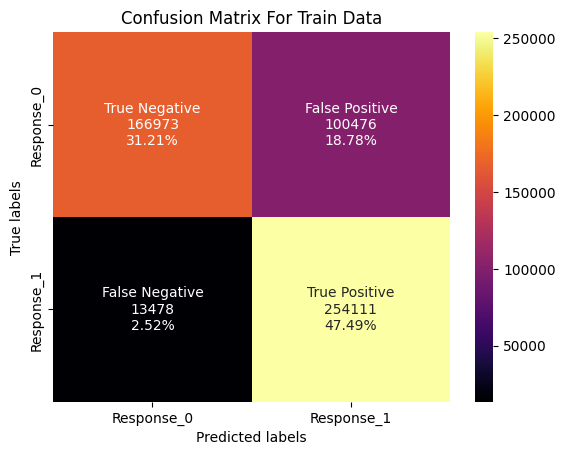

In [114]:
# Get the confusion matrix for train Data

labels = ['True Negative','False Positive','False Negative','True Positive']
cm_train_lr = confusion_matrix(y_train, train_class_preds_lr)
print(cm_train_lr)
cm_train_count=cm_train_lr.flatten().tolist()
cm_train_percentage=[round((i*100)/sum(cm_train_count),2) for i in cm_train_count]

cm_train_labels = [f'{v1}\n{v2}\n{v3}%' for v1, v2, v3 in zip(labels, cm_train_count, cm_train_percentage)]
cm_train_labels_array= np.asarray(cm_train_labels).reshape(2,2)
ax= plt.subplot()
sns.heatmap(cm_train_lr, annot=cm_train_labels_array, ax = ax, fmt='', cmap= 'inferno')

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix For Train Data')
ax.xaxis.set_ticklabels(['Response_0', 'Response_1'])
ax.yaxis.set_ticklabels(['Response_0', 'Response_1'])

[[41683 25267]
 [ 3500 63310]]


[Text(0, 0.5, 'Response_0'), Text(0, 1.5, 'Response_1')]

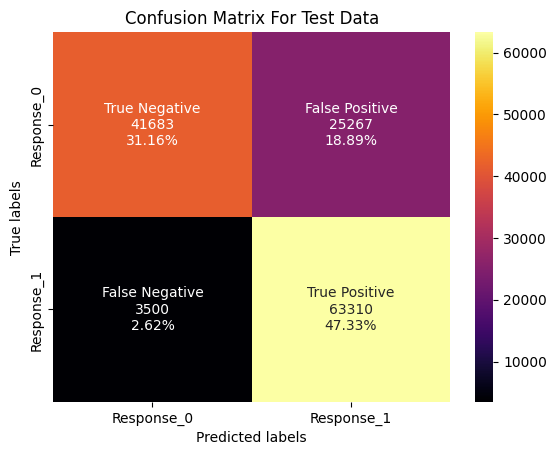

In [115]:
# Get the confusion matrix for test Data

labels = ['True Negative','False Positive','False Negative','True Positive']
cm_test_lr = confusion_matrix(y_test, test_class_preds_lr)
print(cm_test_lr)
cm_test_count=cm_test_lr.flatten().tolist()
cm_test_percentage=[round((i*100)/sum(cm_test_count),2) for i in cm_test_count]

cm_test_labels = [f'{v1}\n{v2}\n{v3}%' for v1, v2, v3 in zip(labels, cm_test_count, cm_test_percentage)]
cm_test_labels_array= np.asarray(cm_test_labels).reshape(2,2)
ax= plt.subplot()
sns.heatmap(cm_test_lr, annot=cm_test_labels_array, ax = ax, fmt='', cmap= 'inferno')

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix For Test Data')
ax.xaxis.set_ticklabels(['Response_0', 'Response_1'])
ax.yaxis.set_ticklabels(['Response_0', 'Response_1'])

In [133]:
fpr, tpr, thresholds = roc_curve(y_test, test_preds_prob_lr[:,1],pos_label=1)
roc_auc = auc(fpr, tpr)

In [134]:
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

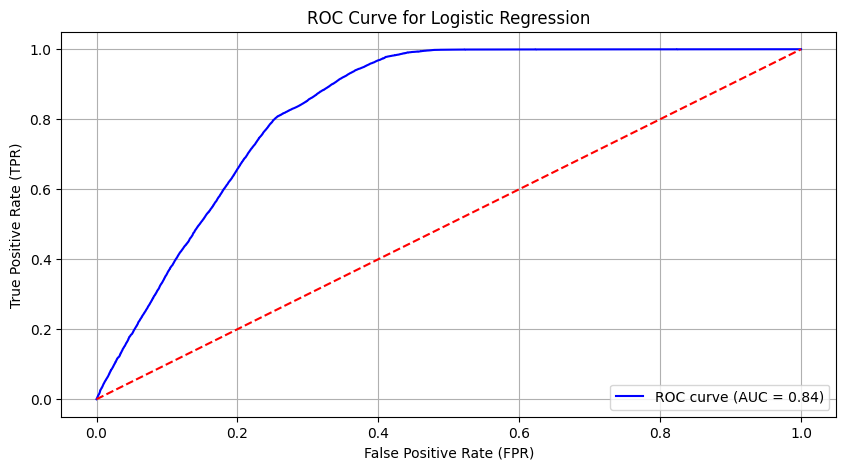

In [138]:
plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, color='blue', lw=1.5, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot(p_fpr, p_tpr, color='red', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Cross-validating Logistic Regression :

In [119]:
logistic= LogisticRegression()

In [120]:
scoring = ['accuracy']
scores = cross_validate(logistic,x_train, y_train, scoring = scoring, cv = 10, return_train_score=True,return_estimator=True,verbose = 10)

[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.787, test=0.787) total time=   2.0s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s


[CV] END ................ accuracy: (train=0.787, test=0.787) total time=   2.7s
[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.787, test=0.784) total time=   2.1s
[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.787, test=0.786) total time=   2.7s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:   10.3s


[CV] END ................ accuracy: (train=0.787, test=0.789) total time=   1.6s
[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.787, test=0.786) total time=   1.6s
[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.787, test=0.789) total time=   1.6s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   7 tasks      | elapsed:   15.5s


[CV] END ................ accuracy: (train=0.787, test=0.785) total time=   2.3s
[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.787, test=0.789) total time=   2.6s
[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.788, test=0.789) total time=   1.5s


In [121]:
scores['train_accuracy']

array([0.78708046, 0.78727982, 0.78715937, 0.78698493, 0.78662358,
       0.78692055, 0.78669004, 0.78702854, 0.78725949, 0.78782643])

In [122]:
scores['test_accuracy']

array([0.78680099, 0.7865767 , 0.78409091, 0.78556743, 0.7886887 ,
       0.78637111, 0.78921202, 0.78528708, 0.78945106, 0.78870344])